Student Details

Name: Cormac Lavery

ID: 16139658

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

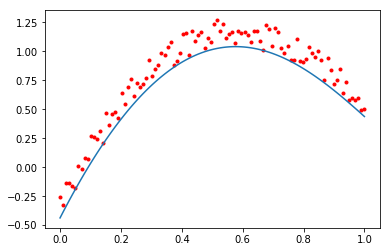

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.plot(X, target(X))
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]
lambdas = list(np.linspace(0,1,1000))
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
best_lambda = lambdas[eout.index(min(eout))]
worst_lambda = lambdas[eout.index(max(eout))]
difference_best_worst = max(eout) - min(eout)
print(best_lambda)
print(worst_lambda)
print(difference_best_worst)

0.001001001001001001
0.0
1.4084630948702925


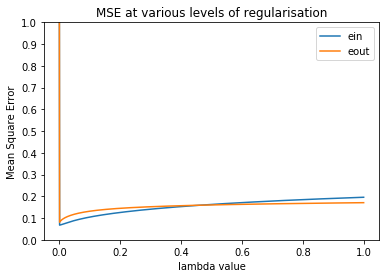

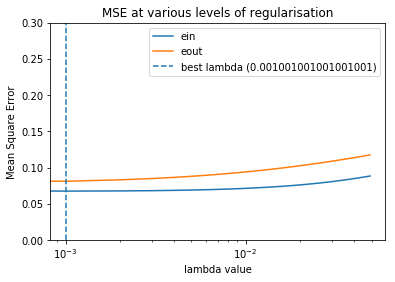

In [32]:
plt.plot(lambdas, ein, label="ein")
plt.plot(lambdas, eout, label="eout")
plt.ylim([0,1])
plt.locator_params(axis='y', nbins=10)
plt.title('MSE at various levels of regularisation')
plt.xlabel("lambda value")
plt.ylabel("Mean Square Error")
plt.legend(loc="upper right")
plt.show()
plt.plot(lambdas[:50], ein[:50], label="ein")
plt.plot(lambdas[:50], eout[:50], label="eout")
plt.ylim([0,.3])
plt.locator_params(axis='y', nbins=10)
plt.axvline(x=best_lambda, linestyle='dashed', label='best lambda ({})'.format(best_lambda))
plt.yscale
plt.title('MSE at various levels of regularisation')
plt.xlabel("lambda value")
plt.ylabel("Mean Square Error")
plt.legend(loc="upper right")
plt.show()

From the above graphs we can ascertain that a lambda of 0.001 results in the smallest error for eout. The difference between this and no regularisation is ~1.4. Thus we can see that regularisation results in a drastic improvement in model performance.

We will now consider the case of no regularisation, our optimum solution, and an overfitted example (i.e. lambdas: 0, 0.001, and 1)

In [10]:
w_over = weights_reg(X_train,y_train,0)
w_optimum = weights_reg(X_train,y_train,best_lambda)
w_under = weights_reg(X_train,y_train,1)
lin_reg(X, w_over)

array([[ 0.00000000e+00, -8.55675566e-02, -1.71135113e-01, ...,
        -8.30005299e+00, -8.38562055e+00, -8.47118810e+00],
       [ 0.00000000e+00,  3.89192615e+00,  7.78385229e+00, ...,
         3.77516836e+02,  3.81408762e+02,  3.85300688e+02],
       [ 0.00000000e+00, -4.87156658e+01, -9.74313316e+01, ...,
        -4.72541958e+03, -4.77413525e+03, -4.82285091e+03],
       ...,
       [ 0.00000000e+00, -3.23462927e+03, -6.46925854e+03, ...,
        -3.13759039e+05, -3.16993669e+05, -3.20228298e+05],
       [ 0.00000000e+00, -9.72824281e+03, -1.94564856e+04, ...,
        -9.43639553e+05, -9.53367796e+05, -9.63096038e+05],
       [ 0.00000000e+00,  7.34496726e+03,  1.46899345e+04, ...,
         7.12461824e+05,  7.19806792e+05,  7.27151759e+05]])

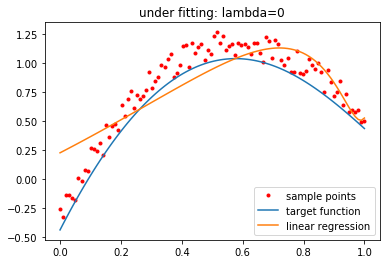

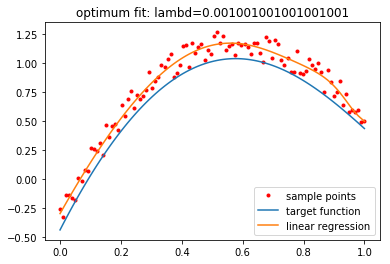

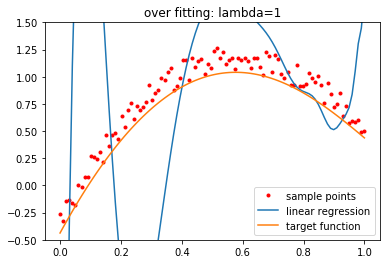

In [11]:
under_p = lin_reg(w_under, X_trans)
optimum_p = lin_reg(w_optimum, X_trans)
over_p = lin_reg(w_over, X_trans)

plt.title('under fitting: lambda={}'.format(0))
plt.plot(X,y,'r.', label="sample points")
plt.plot(X, target(X), label="target function")
plt.plot(X, under_p, label="linear regression")
plt.legend()
plt.plot()
plt.show()

plt.title('optimum fit: lambd={}'.format(best_lambda))
plt.plot(X,y,'r.', label="sample points")
plt.plot(X, target(X), label="target function")
plt.plot(X, optimum_p, label="linear regression")
plt.legend()

plt.plot()
plt.show()

plt.title('over fitting: lambda={}'.format(1))
plt.ylim([-.5, 1.5])
plt.plot(X,y,'r.', label="sample points")
plt.plot(X, over_p, label="linear regression")
plt.plot(X, target(X), label="target function")
plt.legend()
plt.plot()
plt.show()


As we can see a low lambda value can lead to over fitting while too high a lambda can cause under fitting as we ignore too much data. Our best lambda returns what looks like a very good fit

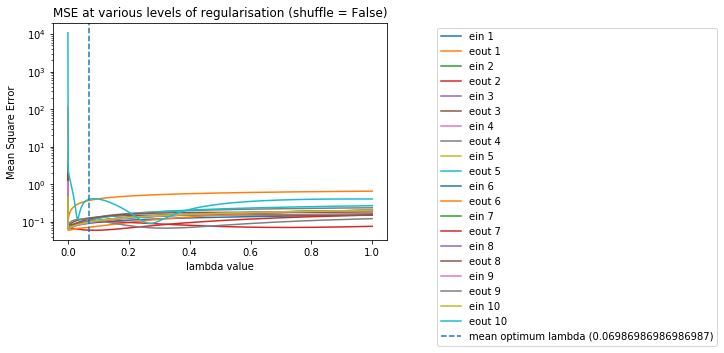

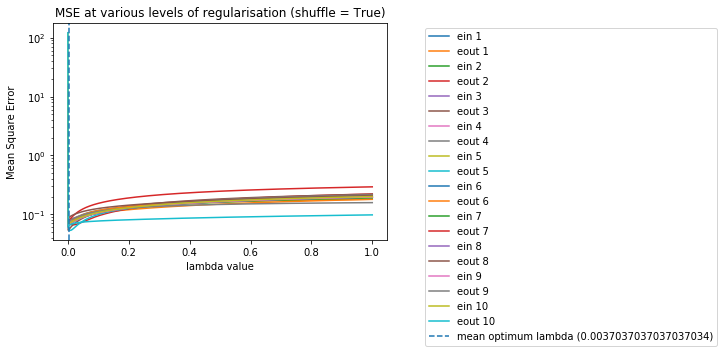

In [56]:
def get_k_folds_best_lambda(X, y, folds, shuffle=False):
    k_fold_optimum_weights = []
    optimum_lambdas = []
    lambdas = list(np.linspace(0,1,1000))
    X_trans = transPoly(X,50)
    kf = KFold(n_splits=folds, shuffle=shuffle)
    kf.get_n_splits(X_trans)
    count = 0
    for train_index, test_index in kf.split(X):
        count = count + 1
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]
        ein=[]
        eout=[]
        weights=[]
        for l in lambdas:    
            w = weights_reg(X_train,y_train,l)
            ein.append(calc_error(w,X_train,y_train))
            eout.append(calc_error(w,X_test,y_test))
            weights.append(w)
        plt.plot(lambdas, ein, label="ein {}".format(count))
        plt.plot(lambdas, eout, label="eout {}".format(count))
        plt.yscale('log')
        plt.title('MSE at various levels of regularisation (shuffle = {})'.format(shuffle))
        plt.xlabel("lambda value")
        plt.ylabel("Mean Square Error")
        optimum_lambdas.append(lambdas[eout.index(min(eout))])
    mean_optimum_lambda = np.mean(optimum_lambdas)
    plt.axvline(x=mean_optimum_lambda, linestyle='dashed', label='mean optimum lambda ({})'.format(mean_optimum_lambda))
    plt.legend(loc="upper right", bbox_to_anchor=(2, 1)) 
    plt.show()
    return mean_optimum_lambda

k_fold_best_lambda_unshuffled = get_k_folds_best_lambda(X, y, 10)
k_fold_best_lambda_shuffled = get_k_folds_best_lambda(X, y, 10, True)

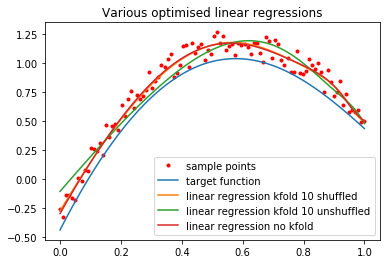

In [61]:
k_fold_best_w = weights_reg(X_train,y_train,k_fold_best_lambda_shuffled)
k_fold_best_p = lin_reg(k_fold_best_w, X_trans)
plt.title('Various optimised linear regressions'.format(k_fold_best_lambda_shuffled))
plt.plot(X,y,'r.', label="sample points")
plt.plot(X, target(X), label="target function")
plt.plot(X, k_fold_best_p, label="linear regression kfold 10 shuffled")
k_fold_best_w = weights_reg(X_train,y_train,k_fold_best_lambda_unshuffled)
k_fold_best_p = lin_reg(k_fold_best_w, X_trans)
plt.plot(X, k_fold_best_p, label="linear regression kfold 10 unshuffled")
plt.plot(X, optimum_p, label="linear regression no kfold")
plt.legend()

plt.show()